# Electricity Energy Indicators - Data Sets and Methodologies

## Importance of Energy Data:

Energy information is essential to drive forward-looking decision by governments, industries, and Canadians. It plays a key role in enhancing public confidence, economic competitiveness and the Government’s ability to support a transition to a low-carbon economy.

## Overview of Energy Information in Canada:
Energy information includes statistics, data, analysis and projections related to the production, transformation, distribution and consumption of energy; as well as the linkages between energy and the economy, society and environment.

Canada's energy information system is a collective contribution of several organizations, including:
- four federal departments or agencies:
  - Natural Resources Canada [(link)](https://www.nrcan.gc.ca/home);
  - Statistics Canada [(link)](https://www.statcan.gc.ca/eng/start);
  - Environment and Climate Change Canada [(link)](https://www.ec.gc.ca/?lang=En);
  - Canada Energy Regulator [(link)](https://www.cer-rec.gc.ca/index-eng.html);
- provincial and territorial government departments, regulators and utilities boards;
- energy market participants (ex. power producers, pipeline companies, system operators, etc.);
- industry associations and academic research bodies;
- Canada’ Open Government website [(link)](https://open.canada.ca/en);
- __Canadian Energy Information Portal (launched in June 2019) [(link)](https://www.statcan.gc.ca/eng/topics-start/energy).__

## Canadian Energy Information Portal:
Although Canadian energy information is abundant, it can be difficult to navigate, interpret and verify, particularly for non-experts. Moreover, data measurements, definitions and reporting standards vary amongst information providers. Often, data is not available in structured and machine-readable formats. Finally, data releases are often not timely, and lags are considered too long for a growing demand for real-time information.

Recognizing the complexity of Canada’s current energy information system, in June 2019, the Government of Canada launched the Canadian Energy Information Portal [(link)](https://www.statcan.gc.ca/eng/topics-start/energy). The Hub is a one stop shop for energy information that provides a single point of access for all federal-government statistics and provides links to existing body of energy information products.

## Goal of this notebook: 

- 1) Identify the main data set featured in Canada’s electricity markets __[Energy Indicators](https://www.cer-rec.gc.ca/nrg/tl/nrgcmmdt/nrgndctrlctrct-eng.html)__;
- 2) Load each data set used in the Energy Indicators into the Jupyter Notebook;
- 3) Chart each data set;
- 4) Provide links to other available data sets for more analysis.

__Data sets used in the Energy Indicators come from multiple free, publicly available sources. Data set files themselves are not provided to accompany the Notebook. Rather, data is loaded directly into the Notebook from the source provider. This ensures transparency, reproducibility and timeliness for the user.__ 

__Data sets used in this Notebook are often not in a flat, machine-readable format. Also, measurement units between various data sets are not standardized. Therefore to provide analytical value, each data set in the Notebook is transformed and standardized to ensure comparability.__

For units not available in this notebook, the Canada Energy Regulator offers a site with extensive energy conversion tables [(link)](https://apps.cer-rec.gc.ca/Conversion/conversion-tables.aspx?GoCTemplateCulture=en-CA). 

In [76]:
# import the following libraries
import pandas as pd 
from tabula import wrapper
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import requests
from datetime import datetime, timedelta
import io
import zipfile
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None
from pandas.plotting import register_matplotlib_converters
from datetime import datetime, timedelta
import xml.etree.ElementTree as ET
from lxml import objectify
register_matplotlib_converters()

# set global parameters
plt.style.use('ggplot')
sns.set_palette(sns.color_palette("tab20", 20))

## Energy Indicators - Electricity:

### Electricity prices in major Canadian cities

#### 1) Main data set
Hydro Quebec, the main electricity producer in Quebec, publishes the annual _Comparison Electricity Prices in Major North American Cities_ report. The report provides annual estimates of electricity costs in Canada nased on consumption of 1,000 kWh per month [(link)](http://www.hydroquebec.com/data/documents-donnees/pdf/comparison-electricity-prices.pdf).

#### 2) Load data set

In [77]:
hq_url_link = 'http://www.hydroquebec.com/data/documents-donnees/pdf/comparison-electricity-prices.pdf'

df = pd.DataFrame(wrapper.read_pdf(hq_url_link, pages = '8-9', guess=False)).reset_index()
df = df.dropna(axis = 1, how = 'all').drop('level_0', axis=1) 
columns = ['City', '2015', '2016', '2017', '2018', '2019']
df.columns = columns
df.head(22)

df_residential = df.iloc[0:6].reset_index(drop = True)
df_residential = df_residential.T
df_residential.columns = df_residential.iloc[0]
df_residential = df_residential[1:]

df_commercial = df.iloc[8:].reset_index(drop = True)
df_commercial = df_commercial.T
df_commercial.columns = df_commercial.iloc[0]
df_commercial = df_commercial[1:]

#### 3) Chart data set

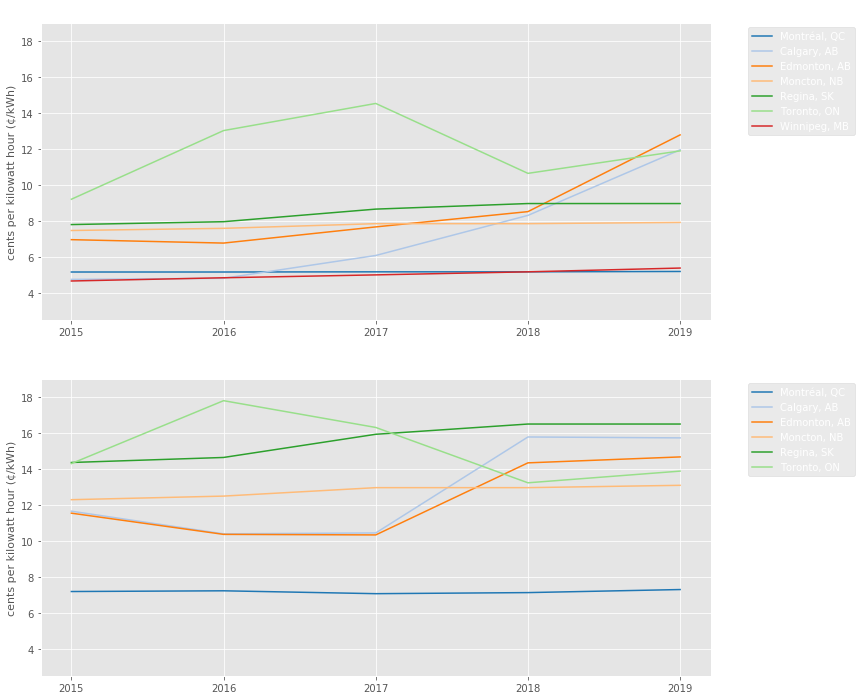

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12,12)) 
ax1.plot(df_commercial)
ax1.set_ylabel('cents per kilowatt hour (¢/kWh)', fontsize=11)
ax1.set_title('Average electricity prices for large-power customers', fontsize=14)
ax1.legend(df_commercial.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax1.set_ylim(2.5, 19);

ax2.plot(df_residential) 
ax2.set_ylabel('cents per kilowatt hour (¢/kWh)', fontsize=11)
ax2.set_title('Average electricity prices for residential customers', fontsize=14)
ax2.legend(df_residential.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax2.set_ylim(2.5, 19);

#### 4) Other data sets for electricity prices in Canada

Outside of Alberta and Ontario, electricity rates are regulated by provincial utility regulation boards.
 
- Newfoundland and Labrador electricity rates provided by NLHydro are regulated by the Newfoundland and Labrador Board of Commissioners of Public Utilities [(link)](https://nlhydro.com/electricity-rates/regulatory-information/);
- Nova Scotia electricity rates provided by Nova Scotia Power are regulated by the Nova Scotia Utility and Review Board [(link)](https://www.nspower.ca/en/home/myaccount/billing-and-payments/power-rates.aspx);
- New Brunswick electricity rates provided by New Brunswick Power are regulated by the New Brunswick Energy and Utilities Board [(link)](https://www.nbpower.com/en/products-services/residential/rates);
- Prince Edward Island electricity rates provided by Maritimes Electric are regulated by the Prince Edward Island Regulatory and Appeals Commission [(link)](https://www.maritimeelectric.com/about-us/regulatory/rates-and-general-rules-and-regulations/);
- Québec electricity rates provided by Hydro-Québec are regulated by the Régie de l’énergie [(link)](http://www.hydroquebec.com/residential/customer-space/rates/); 
- Manitoba electricity rates provided by Manitoba Hydro are regulated by the Public Utilities Board of Manitoba [(link)](https://www.hydro.mb.ca/accounts_and_services/rates/);
- Saskatchewan electricity rates provided by SaskPower are regulated by the Saskatchewan Rate Review Panel [(link)](https://www.saskpower.com/Accounts-and-Services/Billing/Power-Rates/Power-Supply-Rates);
- British Columbia electricity rates provided by BC Hydro are regulated by the  British Columbia Utilities Commission [(link)](https://app.bchydro.com/accounts-billing/rates-energy-use/electricity-rates.html); 
- Yukon electricity rates provided by ATCO Electric Yukon [(link)](https://www.atcoelectricyukon.com/en-ca/customer-billing-rates/rates-regulations.html) and Yukon Energy [(link)](https://yukonenergy.ca/customer-service/accounts-billing/rate-schedules) are regulated by the Yukon Utilities Board; 
- Northwest Territories electricity rates provided by Northwest Territories Power Corporation are regulated by the NWT Public Utilities Board [(link)](https://www.ntpc.com/customer-service/residential-service/what-is-my-power-rate);
- Nunavut electricity rates provided by Qulliq Energy Corporation are regulated by the Utility Rates Review Council [(link)](http://www.qec.nu.ca/customer-care/accounts-and-billing/customer-rates).

Ontario and Alberta have open and competitive wholesale electricity markets where electricity prices fluctuate hourly based on market conditions. Supply and demand of electricity is managed by an independent system operator. 

Due to the design of the electricity market in these two provinces, real-time information on market conditions is available from system operators. Large market participants use this information to make short- and long-term decisions on their participation in the electricity market. While the electricity price is market-driven, transmission and distribution rates continue to be regulated; by the Ontario Energy Board in Ontario [(link)](https://www.oeb.ca/about-us/mission-and-mandate/ontarios-energy-sector) and the Alberta Utilities Commission in Alberta [(link)](http://www.auc.ab.ca/pages/electric-industry.aspx). 

##### 4)a) Recent and real time prices in Alberta

In Alberta, the Alberta Electric System Operator (AESO) manages and operates the province's power grid.  The AESO provides real-time and historical data on the wholesale electricity prices, supply and demand, transmission and generation outages, ancillary services, operating reserves and other resources for market participants. Current and historical AESO data is available on the AESO website [(link)](http://ets.aeso.ca/). 

The following cells provide hourly electricity prices in Alberta for the last two weeks; as well as real time electricity prices.

In [79]:
# hourly electricity prices in Alberta for the last two weeks
# source data available at http://ets.aeso.ca/
# see Pool Price report from Historical Reports tab
# control time_delta for duration from today; default set to last 14 days

today = datetime.now().strftime('%m%d%Y')
time_delta = pd.to_datetime(datetime.today() - timedelta(days=14)).strftime('%m%d%Y')

url = 'http://ets.aeso.ca/ets_web/ip/Market/Reports/HistoricalPoolPriceReportServlet?beginDate=' + str(time_delta) + '&endDate=' + str(today) + '&contentType=csv'
df = pd.read_csv(url, engine = 'python', header = 1)
df[['date', 'hour']] = df['Date (HE)'].str.split(" ", expand = True)
df['hour'] = df['hour'].astype('int32')
df['hour'] = df['hour'] - 1
df['Date'] = pd.to_datetime((df['date'].astype(str)+ ' ' + df['hour'].astype(str)), format = '%m/%d/%Y %H')
df = df.drop(['date', 'hour', 'Date (HE)', 'AIL Demand (MW)'], axis = 1 )
df = df.set_index('Date')
df[['Price ($)', '30Ravg ($)']] = df[['Price ($)', '30Ravg ($)']].apply(pd.to_numeric, errors = 'coerce')

ValueError: invalid literal for int() with base 10: '02*'

In [0]:
fig, (ax1)= plt.subplots(ncols=1, nrows=1, figsize=(12, 5))

begin_date = datetime.strftime(df.index.min(), format = '%b %d, %Y')
end_date = datetime.strftime(df.index.max(), format = '%b %d, %Y')
title = 'Hourly Electricity Pool Price in Alberta and the 30-day rolling average ($/Megawatt hour), ' + str(begin_date) + ' to ' + str(end_date)

ax1.plot(df) 
ax1.set_ylabel('$/Megawatt hour', fontsize=11)
ax1.set_title(title)
ax1.legend(df.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax1.xaxis.set_major_locator(dates.DayLocator(interval=5)) 
ax1.xaxis.set_major_formatter(dates.DateFormatter('%a, %B %d, %Y'))

In [0]:
# today's hourly electricity price in Alberta
url = 'http://ets.aeso.ca/ets_web/ip/Market/Reports/ActualForecastWMRQHReportServlet'
df = pd.read_html(url)[1]
df['Date (HE)'] = df['Date (HE)'].str.replace('*','')
df = df.drop_duplicates(subset = 'Date (HE)', keep = 'last')
df[['date', 'hour']] = df['Date (HE)'].str.split(" ", expand = True)
df['hour'] = df['hour'].astype('int32')
df.columns
df['hour'] = df['hour'] - 1
df['Date'] = pd.to_datetime((df['date'].astype(str)+ ' ' + df['hour'].astype(str)), format = '%m/%d/%Y %H')
columns_to_drop = ['date', 'hour', 'Date (HE)', 'Day-Ahead Forecasted AIL', 'Actual AIL',  'Forecasted & Actual AIL Difference']
df = df.drop(columns_to_drop, axis = 1)
df = df.set_index('Date') 
columns = df.columns
df = df[columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [0]:
f, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
ax.plot(df)
ax.set_ylim(bottom=0)
ax.set_ylabel('$/Megawatt hour', fontsize=11)
today_date = datetime.today().strftime(format = '%b %d, %Y')
title = "Real-time forecast and actual hourly electricity prices in Alberta"
ax.set_title(title)
ax.legend(df.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax.xaxis.set_minor_locator(dates.HourLocator(interval=4))    
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M'))   
ax.xaxis.set_major_locator(dates.DayLocator(interval = 1))
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%A, %B %d, %Y')) 

##### 4)b) Recent and real time prices in Ontario

In Ontario, the Independent Electric System Operator (IESO) manages and operates the province's power grid. The IESO provides real-time and historical data on the wholesale electricity prices, supply and demand, transmission and generation outages, ancillary services and operating reserves and other resources for market participants. Current and historical AESO data is available on the IESO website [(link)](http://www.ieso.ca/power-data). 

In Ontario, the Hourly Ontario Energy Price (HOEP) is charged to local distribution companies (LDCs), other non-dispatchable loads and paid to self-scheduling generators. Businesses that use more than 250,000 kWh a year pay the hourly price. The HOEP is also the basis for regulated rates charged to residential and small business customers.

In addition to the HOEP, all Ontario electricity customers pay for the global adjustment. The global adjustment covers the cost of building new electricity infrastructure, as well as delivering Ontario's conservation programs. Information on the global adjustment is available on the IESO website [(link)](http://www.ieso.ca/en/Learn/Electricity-Pricing/What-is-Global-Adjustment). 

The following cells provide hourly electricity prices in Ontario for the last two weeks; as well as real time electricity prices.

In [0]:
#recent electricity prices in Ontario
# HOEP in 2019; HOEP from 2002 to available at http://reports.ieso.ca/public/PriceHOEPPredispOR/ 

url = 'http://reports.ieso.ca/public/PriceHOEPPredispOR/PUB_PriceHOEPPredispOR_2019.csv'
df = pd.read_csv(url, header = 3, parse_dates=['Date'])
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Hour']-1, unit='h')
df = df.set_index('Datetime')
df = df[['HOEP']]

In [0]:
f, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
time_delta = 14*24 #last two weeks
ax.plot(df.tail(time_delta))
ax.set_ylabel('Megawatts', fontsize=11)
title = "Real-time electricity price in Ontario (Hourly Ontario Energy Price)"
ax.set_title(title)
ax.legend(df.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax.xaxis.set_major_locator(dates.DayLocator(interval=5)) 
ax.xaxis.set_major_formatter(dates.DateFormatter('%a, %B %d, %Y'))

In [0]:
# today's real-time electricity price in Ontario

url = 'http://www.ieso.ca/-/media/Files/IESO/Power-Data/Price-Today.xml'
xml = objectify.parse(url)
root = xml.getroot()

today_date = [x.text for x in root.iter()]
today_date = today_date[1][0:10]
today_date = today_date.replace('-', '',)
yesterday_date = (pd.to_datetime(today_date) - timedelta(days=1)).strftime("%Y%m%d")

try:        
    xml = objectify.parse('http://reports.ieso.ca/public/DispUnconsHOEP/PUB_DispUnconsHOEP_' + str(today_date) + '.xml')
except:
     xml = objectify.parse('http://reports.ieso.ca/public/DispUnconsHOEP/PUB_DispUnconsHOEP_' + str(yesterday_date) + '.xml')

root = xml.getroot()
hour = [x.text for x in root.iter('{http://www.theIMO.com/schema}Hour')]
price = [x.text for x in root.iter('{http://www.theIMO.com/schema}Price')]

df = pd.DataFrame({'hour': hour, 'price' : price, 'date': today_date})

df['datetime'] = df['date'].astype(str) + df['hour'].astype(str)
df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y%m%d%H')
df = df.set_index('datetime')
df = df.drop(['date', 'hour'], axis = 1 )
df['price'] = df['price'].astype('float')

In [0]:
f, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
ax.plot(df)
ax.set_ylabel('$/Megawatt hour', fontsize=11)
ax.set_title("Real-time electricity prices in Ontario (Hourly Ontario Energy Price)")
ax.legend(df.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax.xaxis.set_minor_locator(dates.HourLocator(interval=4))    
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M'))   
ax.xaxis.set_major_locator(dates.DayLocator(interval = 1))
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%A, %B %d, %Y')) 

## Installed electric power generation capacity
Electrical power plants convert a form of energy such as heat, motion, or solar into electrical energy. Capacity refers to the theoretical peak output of a power facility. Generation refers to the cumulative output over time. Due to fluctuations in output, particularly for renewable energy sources, the relationship between capacity and generation varies. Hydro power is the largest source of both capacity and generation in Canada.

#### 1) Main data set
Statistics Canada publishes *Installed plants, annual generating capacity by type of electricity generation (Table: 25-10-0022)* [(link)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510002201). This annual report provides total generation capacity by fuel type. 


#### 2) Load data set to notebook

In [0]:
url_25100022 = 'https://www150.statcan.gc.ca/n1/tbl/csv/25100022-eng.zip'
file_name = '25100022.csv'
r = requests.get(url_25100022, allow_redirects=True)
zip_file = zipfile.ZipFile(io.BytesIO(r.content))
installed_capacity0 = pd.read_csv(zip_file.open(file_name), index_col=None, header=0, parse_dates=['REF_DATE'], low_memory=False)
installed_capacity = installed_capacity0[(installed_capacity0['GEO'] == 'Canada') & ((installed_capacity0['REF_DATE'] >= '2013'))
                                        & (installed_capacity0['Class of electricity producer'] == 'Total all classes of electricity producer')
                                       & (installed_capacity0['Type of electricity generation'] != 'Total installed capacity')][['REF_DATE', 'Type of electricity generation', 'VALUE']]
installed_capacity['VALUE'] = installed_capacity['VALUE']/1000000
installed_capacity = installed_capacity.pivot_table(index='REF_DATE', columns='Type of electricity generation', aggfunc=np.sum)['VALUE']
installed_capacity = installed_capacity.replace(0.000000, np.nan).drop(columns = ['Combustion turbine', 'Conventional steam turbine', 'Internal combustion turbine'])
date = pd.DataFrame( data = installed_capacity.index)
date['year'] = date['REF_DATE'].dt.year

#### 3) Chart data set

In [0]:
ax1 = installed_capacity.plot(kind='bar', stacked=True, figsize=(12,6), width = 0.8)
ax1.set_ylabel('Terawatt', fontsize=11)
ax1.set_xlabel('Year', fontsize=11)
ax1.set_title('Installed electric power generation capacity', fontsize=15)
ax1.legend(installed_capacity.columns, fontsize=11, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.4)
ax1.set_xticklabels(date['year'], rotation=0);

In 2017, installed electricity generation capacity in Canada reached 145.2 GW. The electricity capacity mix varies significantly among provinces and territories, reflecting the type of energy available, economic viability, and
policy choices. Hydroelectricity remains the dominant source of electricity, accounting for 55.6% of total capacity. Thermal (natural gas and coal) and nuclear are the most common sources of electricity generation after hydroelectricity, with non-hydro renewables such as wind, solar, and biomass making up the smallest portion of the capacity mix. 


#### 4) Other data sets for installed electric power generation capacity

The Canada Energy Regulator publishes the annual *Energy Futures* report, a projection of electricity supply and demand through 2040 [(link)](https://www.cer-rec.gc.ca/nrg/ntgrtd/ftr/2018/pblctn-eng.html). The report includes data and analysis on historical and projected electricity generation capacity in Canada (Electricity Capacity 2018) [(link)](https://open.canada.ca/data/en/dataset/94d3af0e-851c-47f3-8919-998c384b0e71).

Ontario's IESO publishes a report on hourly electric capability and output by generating station [(link)](http://reports.ieso.ca/public/GenOutputCapability/PUB_GenOutputCapability_20190902.xml).  

Manitoba Hydro provides a detailed description of all generating stations in Manitoba, and their capacities [(link)](https://www.hydro.mb.ca/corporate/facilities/generating_stations/).

SaskPower provides a map of Saskatchewan facilities' electric generation capacity [(link)](https://www.saskpower.com/Our-Power-Future/Our-Electricity/Electrical-System/System-Map).

Alberta's AESO publishes a report on current electric capacity (Maximum Capability) [(link)](http://ets.aeso.ca/ets_web/ip/Market/Reports/CSDReportServlet). 

BC Hydro provides a detailed description of all power generation facilities in British Columbia [(link)](https://www.bchydro.com/energy-in-bc/operations/our-facilities.html).

## Electric power generation
Electric power generation in Canada is dominated by hydro power. In 2018, Canada’s electricity generation was 66.0% renewable (includes hydro), and 80.6% was non-emitting (includes nuclear). Non-hydro renewable generation has grown since 2005 from 1.5% to 7.2% of total generation in 2018. Electricity generation not consumed domestically is exported. 


#### 1) Main data set

Statistics Canada publishes *Electric power generation, monthly generation by type of electricity (Table: 25-10-0015)* [(link)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510001501). This monthly report provides total electricity generation by type and by province.

#### 2) Load data set

In [0]:
url_demand = 'https://www150.statcan.gc.ca/n1/en/tbl/csv/25100015-eng.zip' 
file_name = '25100015.csv'
r = requests.get(url_demand, allow_redirects=True)
zip_file = zipfile.ZipFile(io.BytesIO(r.content))
monthly_power_gen_type0 = pd.read_csv(zip_file.open(file_name), index_col=None, header=0, parse_dates=['REF_DATE'], low_memory=False)

monthly_power_gen_type = monthly_power_gen_type0[(monthly_power_gen_type0['Type of electricity generation'] != 'Total all types of electricity generation')
                                      & (monthly_power_gen_type0['Class of electricity producer'] == 'Total all classes of electricity producer')
                                      & (monthly_power_gen_type0['GEO'] == 'Canada') & (monthly_power_gen_type0['REF_DATE'] >= '2016')]
monthly_power_gen_type['VALUE'] = monthly_power_gen_type['VALUE']/1000000
monthly_power_gen_type = monthly_power_gen_type.pivot_table(index='REF_DATE', columns='Type of electricity generation', aggfunc=np.sum)['VALUE']
monthly_power_gen_type = monthly_power_gen_type[['Hydraulic turbine', 'Total electricity production from combustible fuels', 
                                       'Nuclear steam turbine', 'Other types of electricity generation', 
                                       'Solar', 'Tidal power turbine', 'Wind power turbine']]

df_rgen = monthly_power_gen_type0[(monthly_power_gen_type0['Type of electricity generation'] == 'Total all types of electricity generation')
                                      & (monthly_power_gen_type0['Class of electricity producer'] == 'Total all classes of electricity producer')
                                      & (monthly_power_gen_type0['GEO'] != 'Canada') & (monthly_power_gen_type0['REF_DATE'] >= '2016')]
df_rgen1 = df_rgen.pivot_table(index='REF_DATE', columns='GEO', values = 'VALUE')

#### 3) Chart data set

In [0]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12, 12))
ax1.stackplot(monthly_power_gen_type.index, monthly_power_gen_type.fillna(0).T)
ax1.set_ylabel('Terawatt hours', fontsize=9)
ax1.set_title('Monthly electric power generation by type', fontsize=15)
ax1.legend(monthly_power_gen_type.columns, fontsize=11, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.4);

ax2.stackplot(df_rgen1.index,df_rgen1.T/1000000) 
ax2.set_ylabel('Terawatt hours', fontsize=11)
ax2.set_title('Monthly electric power generation by province', fontsize=15)
ax2.legend(df_rgen1.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4);

#### 4) Other data sets for electric power generation in Canada

Newfoundland and Labrador Board of Commissioners of Public Utilities publishes a daily report of supply and demand [(link)](http://www.pub.nf.ca/applications/IslandInterconnectedSystem/DemandStatusReports.htm).

Ontario's IESO publishes a report on hourly electric capability and output by generating station [(link)](http://reports.ieso.ca/public/GenOutputCapability/PUB_GenOutputCapability_20190902.xml).  

Alberta's AESO publishes a report on current electric generation (Total Net Generation) [(link)](http://ets.aeso.ca/ets_web/ip/Market/Reports/CSDReportServlet). 

## Electricity consumption
Electricity consumption varies widely across Canada. Population and the prevelance of heavy industry are the major influences. Additionally, some provinces have preferred fuel types for energy services like space and water heating, which also affect regional demand. Due to its size, industries, and preference for electricity for space and water heating, Quebec is the largest consumer of electricity in Canada.

#### 1) Main data set

Statistics Canada publishes *Electric power generation, monthly receipts, deliveries and availability (Table: 25-10-0016)* [(link)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510001601). This monthly report provides electric power consumption by province.



#### 2) Load data

In [0]:
url_25100016 = 'https://www150.statcan.gc.ca/n1/tbl/csv/25100016-eng.zip'
file_name = '25100016.csv'
r = requests.get(url_25100016, allow_redirects=True)
zip_file = zipfile.ZipFile(io.BytesIO(r.content))
monthly_demand = pd.read_csv(zip_file.open(file_name), index_col=None, header=0, parse_dates=['REF_DATE'], low_memory=False)
monthly_demand = monthly_demand[(monthly_demand['GEO'] != 'Canada') & (monthly_demand['REF_DATE'] >='2016') &
                                (monthly_demand['Electric power, components'] == 'Total electricity available for use within specific geographic border')][['REF_DATE', 'GEO', 'VALUE']]
monthly_demand['VALUE'] = monthly_demand['VALUE']/1000000
monthly_demand = monthly_demand.pivot_table(index='REF_DATE', columns='GEO', aggfunc=np.sum)['VALUE']

#### 3) Chart data set

In [0]:
fig, (ax1)= plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
ax1.plot(monthly_demand) 
ax1.set_ylabel('Terawatt hours', fontsize=11)
ax1.set_title('Monthly electricity demand by province', fontsize=15)
ax1.legend(monthly_demand.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)

Monthly demand for electricity in Canada varies from approximately 45 terawatt hours to over 60 terawatt hours per month. Demand follows a seasonal pattern, with most provinces having peak demand in the winter. Seasonal fluctuations are driven by demand from commerical and residential sectors, with demand increasing during the winter season for space heating requirements. In general, industrial demand for electricity is consistent year-round. 

Québec's and Maritime provinces' seasonality is much more pronounced, because of electric space heating. This is in contrast to the rest of Canada, which uses natural gas for home space heating during the winter. 

#### 4) Other data sets for electricity consumption in Canada

Annual electricity demand data by sector is available from Statistics Canada’s *Supply and demand of primary and secondary energy in terajoules, annual  Table 25-10-0029* [(link)](https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=2510002901). The report includes data in energy units (terajoules), which allows across fuel comparisons and summations. Statistics Canada also publishes *Supply and demand of primary and secondary energy in natural units (Table 25-10-0030-01).* This report contains the same data but in natural units, which vary by energy type (litres for liquid fuel, GWh for electricity, etc.) and therefore are not always additive or directly comparable across fuel types [(link)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510003001).

Natural Resources Canada’s *National End-use Database* [(link)](http://oee.nrcan.gc.ca/corporate/statistics/neud/dpa/home.cfm?attr=0) includes detailed information on end-uses within a sector (such as electric space heating, cooling and appliance use in the residential sector), as well as more detailed sector disaggregation. 

Newfoundland and Labrador Board of Commissioners of Public Utilities publishes a daily report of supply and demand [(link)](http://www.pub.nf.ca/applications/IslandInterconnectedSystem/DemandStatusReports.htm).

Nova Scotia Power provides hourly updates on electricity generation in Nova Scotia, as well as a daily report on the last 30 days of provincial wind generation and capability [(link)](https://www.nspower.ca/en/home/about-us/todayspower.aspx#%20). Historical hourly demand for Nova Scotia is also available [(link)](http://oasis.nspower.ca/en/home/oasis/monthly-reports/hourly-total-net-nova-scotia-load.aspx). 

New Brunswick publishes a report with  hourly provincial demand and flows on interconnects bordering New Brunswick [(link)](https://tso.nbpower.com/Public/en/system_information_archive.aspx). 

Alberta's AESO and Ontario's IESO provide real-time data on hourly demand for electricity. 

##### 4)a) Recent and real-time demand for electricity in Alberta

In [0]:
# hourly electricity demand in Alberta for the last two weeks
# source data available at http://ets.aeso.ca/

today = datetime.today().strftime('%m%d%Y')
time_delta = pd.to_datetime(datetime.today() - timedelta(days=23)).strftime('%m%d%Y')

url_csv = 'http://ets.aeso.ca/ets_web/ip/Market/Reports/HistoricalPoolPriceReportServlet?beginDate=' + str(time_delta) + '&endDate=' + str(today) + '&contentType=csv'
df = pd.read_csv(url_csv, engine = 'python', header = 1)
df[['date', 'hour']] = df['Date (HE)'].str.split(" ", expand = True)
df['hour'] = df['hour'].astype('int32')
df['hour'] = df['hour'] - 1
df['Date'] = pd.to_datetime((df['date'].astype(str)+ ' ' + df['hour'].astype(str)), format = '%m/%d/%Y %H')
df = df.drop(['date', 'hour', 'Date (HE)', 'Price ($)',  '30Ravg ($)'], axis = 1 )
df = df.set_index('Date')
df['AIL Demand (MW)'] = df['AIL Demand (MW)'].apply(pd.to_numeric, errors = 'coerce')

In [0]:
fig, (ax1)= plt.subplots(ncols=1, nrows=1, figsize=(12, 6))

begin_date = datetime.strftime(df.index.min(), format = '%b %d, %Y')
end_date = datetime.strftime(df.index.max(), format = '%b %d, %Y')
title = 'Hourly electricity demand in Alberta, ' + str(begin_date) + ' to ' + str(end_date)

ax1.plot(df) 
ax1.set_ylabel('Megawatts', fontsize=11)
ax1.set_title(title)
ax1.legend(df.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax1.xaxis.set_major_locator(dates.DayLocator(interval=5)) 
ax1.xaxis.set_major_formatter(dates.DateFormatter('%a, %B %d, %Y'))

##### 4)a) Recent and real-time demand for electricity in Ontario

In [0]:
# hourly electricity demand dat
# see Hourly Demand Report for 2019, http://reports.ieso.ca/public/Demand/

url = 'http://reports.ieso.ca/public/Demand/PUB_Demand_2019.csv'
df = pd.read_csv(url, header = 3, parse_dates=['Date'])
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Hour']-1, unit='h')
df = df.drop(['Date', 'Hour'], axis = 1)
df = df.set_index('Datetime')

In [0]:
f, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
ax.plot(df.tail(400))
ax.set_ylim(bottom=0)
ax.set_ylabel('Megawatts', fontsize=11)
title = "Hourly electricity demand in Ontario and Market"
ax.set_title(title)
ax.legend(df.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)
ax.xaxis.set_major_locator(dates.DayLocator(interval=5)) 
ax.xaxis.set_major_formatter(dates.DateFormatter('%a, %B %d, %Y'))

## Electricity exports

#### 1) Main dataset

Canada Energy Regulator (CER) regulates imports and exports of energy commodities. Companies importing and exporting electricity hold regulatory authorization from the CER and are required to report their export/import activities each month. Statistics for the exports of electricity are available in the Commodities Tracking System (CTS) on the CER website [(link)](https://apps.cer-rec.gc.ca/CommodityStatistics/Statistics.aspx?language=english). Flat, machine-readable files from CTS are also available on the Canada Open Gov website and are updated monthly [(link)](https://open.canada.ca/data/en/dataset/5c358f51-bc8c-4565-854d-9d2e35e6b178).

#### 2) Load data set

In [0]:
url_link = 'https://www.cer-rec.gc.ca/open/imports-exports/electricity-exports-and-imports-monthly.csv'
df = pd.read_csv(url_link, encoding='latin-1', parse_dates = ['Period'])
df['Activity'] = df['Activity'].str.strip()
df['Source'] = df['Source'].str.strip()
df = df[(df['Activity'] == 'Exports') & (df['Source'] != 'Total')][['Period', 'Source', 'Energy (MW.h)']]
df['Energy (MW.h)'] = df['Energy (MW.h)']/1000000
df = df.pivot_table(index = 'Period', columns = 'Source', aggfunc = np.sum)['Energy (MW.h)']

#### 3) Chart data set

In [0]:
fig, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 5))
ax.stackplot(df.index, df.fillna(0).T)
ax.set_ylabel('Terawatt hours', fontsize=9)
ax.set_title('Monthly electricity imports by province', fontsize=15)
ax.legend(df.columns, fontsize = 11, bbox_to_anchor = (1.05, 1), loc = 2)
ax.xaxis.set_major_locator(dates.YearLocator(3))

Canada only exports electricity to the U.S. These exports are predominately sourced from provinces with large hydro-electric generation capability: Quebec, British Columbia, and Manitoba. In 2018, annual export volumes were 61.4 TW.h, a decrease of 15% from the previous year. 

In general, electricity trade levels are impacted by prices, weather, and regional supply and demand factors. Regional supply factors include availability of surplus generation, supply outages, and precipitation levels. Regional demand factors include seasonal and daily temperature variations and industrial use patterns. All these factors combined contribute to the variability of trade levels from year to year. 

#### 4) Other data sets for electricity exports from Canada

Data on electricity exports quantity and values by trading country can also be found in the Canadian International Merchandise and Trade (CIMT) database [(link)](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=eng). This report is based on customs-based trade data, which are derived from the administrative records of the Canadian Border Services Agency and the United States Customs Border Protection. The Harmonized System (HS) code for *electric energy* is 27160000. 

Statistics Canada publishes *Electric power, electric utilities and industry, annual supply and disposition (Table: 25-10-0021-01)*. The report contains data on electricity imports and exports and is updated annually [(link)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510002101). This report also contain inter-provincial receipts and deliveries of electricity by province.

Statistics Canada publishes *Electric power generation, monthly receipts, deliveries and availability* report (Table: 25-10-0016-01). The monthly report provides electricity imports and export by province [(link)](https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=2510001601). 

Ontario's IESO provides hourly import/export data on Ontario's interties with neighbouring jurisdictions, including Manitoba, Michigan, Minnesota, New York and Quebec [(link)](http://reports.ieso.ca/public/IntertieScheduleFlowYear/).  

Nova Scotia Power provides realtime data on regional electricity imports and exports in Nova Scotia [(link)](http://oasis.nspower.ca/en/home/oasis/system-reports-and-messages/daily-report.aspx). 

New Brunswick publishes a report with hourly flows on interconnects outside of New Brunswick (including Nova Scotia, Québec, Prince Edward Island, Northern Maine and New England) [(link)](https://tso.nbpower.com/Public/en/system_information_archive.aspx). 

The government of British Columbia publishes monthly and annual summaries of total electricity imported and exported to the US, as well as inter-provinical trade [(link)](https://www2.gov.bc.ca/gov/content/data/statistics/business-industry-trade/trade/trade-data). BC Hydro also provides real-time detailed BC/US and BC/Alberta interties trade statistics in five minute increments [(links)](https://www.bchydro.com/energy-in-bc/operations/transmission/transmission-system/actual-flow-data.html).

The US Energy Information Administration publishes the US electricity interchange with balancing authorities in neighbouring countries report, which provides daily trade data between Canada and the US [(link)](https://www.eia.gov/beta/electricity/gridmonitor/dashboard/electric_overview/US48/US48).

## Electricity imports

#### 1) Main data set

Canada Energy Regulator (CER) regulates imports and exports of energy commodities. Companies importing and exporting electricity hold regulatory authorization from the CER and are required to report their export/import activities each month. Statistics for the exports of electricity are available in the Commodities Tracking System (CTS) on the CER website [(link)](https://apps.cer-rec.gc.ca/CommodityStatistics/Statistics.aspx?language=english). Flat, machine-readable files from CTS are also available on the Canada Open Gov website and are updated monthly [(link)](https://open.canada.ca/data/en/dataset/5c358f51-bc8c-4565-854d-9d2e35e6b178).

#### 2) Load data set

In [0]:
url_link = 'https://www.cer-rec.gc.ca/open/imports-exports/electricity-exports-and-imports-monthly.csv'
df = pd.read_csv(url_link, encoding='latin-1', parse_dates = ['Period'])
df['Activity'] = df['Activity'].str.strip()
df['Destination'] = df['Destination'].str.strip()
df = df[(df['Activity'] == 'Imports') & (df['Destination'] != 'Total')][['Period', 'Destination', 'Energy (MW.h)']]
df['Energy (MW.h)']= df['Energy (MW.h)']/1000000 #convert to terawatt hours
df = df.pivot_table(index = 'Period', columns = 'Destination', aggfunc = np.sum)['Energy (MW.h)']

#### 3) Chart data set

In [0]:
fig, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(12, 5))
ax.stackplot(df.index, df.fillna(0).T)
ax.set_ylabel('Terawatt hours', fontsize=9)
ax.set_title('Monthly electricity imports by province', fontsize=15)
ax.legend(df.columns, fontsize = 11, bbox_to_anchor = (1.05, 1), loc = 2)
ax.xaxis.set_major_locator(dates.YearLocator(3))

Canada imports some electricity from the United States. The integrated Canada-US power grid allows for bi-directional flows to help meet fluctuating regional supply and demand. 

Canadian provinces have a greater capacity to exchange electricity with American states along north-south interconnections than between neighboring Canadian provinces. Therefore, although electricity pricing in U.S. markets is usually higher than in Canadian markets, provinces frequently import electricity from the U.S. when domestic supply is limited; transmission capacity from other Canadian jurisdictions is constrained; or at times of the day when prices in the U.S. are low.


#### 4) Other data sets for electricity imports to Canada


Data on electricity imports quantity and values by trading country can also be found in the Canadian International Merchandise and Trade (CIMT) database [(link)](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=eng). This report is based on customs-based trade data, which are derived from the administrative records of the Canadian Border Services Agency and the United States Customs Border Protection. The Harmonized System (HS) code for 'electric energy' is 27160000. 

Statistics Canada publishes *Electric power, electric utilities and industry, annual supply and disposition (Table: 25-10-0021-01)*. The report contains data on electricity imports and exports and is updated annually [(link)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510002101). This report also contain inter-provincial receipts and deliveries of electricity by province.

Statistics Canada publishes *Electric power generation, monthly receipts, deliveries and availability* report (Table: 25-10-0016-01). The monthly report provides electricity imports and export by province [(link)](https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=2510001601). 

Ontario's IESO provides hourly import/export data on Ontario's interties with neighbouring jurisdictions, including Manitoba, Michigan, Minnesota, New York and Quebec [(link)](http://reports.ieso.ca/public/IntertieScheduleFlowYear/).  

Nova Scotia Power provides realtime data on regional electricity imports and exports in Nova Scotia [(link)](http://oasis.nspower.ca/en/home/oasis/system-reports-and-messages/daily-report.aspx). 

New Brunswick publishes a report with hourly flows on interconnects outside of New Brunswick (including Nova Scotia, Québec, Prince Edward Island, Northern Maine and New England) [(link)](https://tso.nbpower.com/Public/en/system_information_archive.aspx). 

The government of British Columbia publishes monthly and annual summaries of total electricity imported and exported to the US, as well as inter-provinical trade [(link)](https://www2.gov.bc.ca/gov/content/data/statistics/business-industry-trade/trade/trade-data). BC Hydro also provides real-time detailed BC/US and BC/Alberta interties trade statistics in five minute increments [(links)](https://www.bchydro.com/energy-in-bc/operations/transmission/transmission-system/actual-flow-data.html).

The US Energy Information Administration publishes the US electricity interchange with balancing authorities in neighbouring countries report, which provides daily trade data between Canada and the US [(link)](https://www.eia.gov/beta/electricity/gridmonitor/dashboard/electric_overview/US48/US48).

## Electricity Supply and Demand Projection

#### 1) Main dataset
The Canada Energy Regulator publishes an annual supply and demand report, *Canada's Energy Future*, with historical data and projections for electricity. In the 2018 report Reference Case, total electricity demand increases from 525 TWh hours in 2017 to 633 TWh per year in 2040. Generation increases from 639 TWh in 2017 to 720 TWh in 2040. Most of the difference between generation and consumption is exported. The report includes context for projections, including assumptions and analysis ([report](https://www.neb-one.gc.ca/nrg/ntgrtd/ftr/2018/index-eng.html), [data sets](https://open.canada.ca/data/en/dataset/94d3af0e-851c-47f3-8919-998c384b0e71)).

#### 2) Load data set

In [0]:
end_use_demand_url = 'https://www.neb-one.gc.ca/open/energy/energyfutures2018/end-use-demand-2018.csv'
end_use_demand = pd.read_csv(end_use_demand_url)
end_use_demand = end_use_demand[(end_use_demand['Region'] == 'Canada') & (end_use_demand['Variable_English'] == 'Electricity') 
                                & (end_use_demand['Sector'] != 'Total End-Use') & (end_use_demand['Case'] == 'Reference')][['Year', 'Sector', 'Value']]
end_use_demand['Value'] = end_use_demand['Value']/3.6 # divide by 3.6 to convert to watts
end_use_demand = end_use_demand.pivot_table(index='Year', columns='Sector', aggfunc=np.sum)['Value']

In [0]:
df_gen = pd.read_csv('https://www.neb-one.gc.ca/open/energy/energyfutures2018/electricity-generation-2018.csv')
df_gen1 = df_gen[(df_gen['Region']=='Canada') & (df_gen['Case']=='Reference')]
pvt_gen = df_gen1.pivot_table(index = 'Year', columns = 'Variable_English', values='Value')

#### 2) Chart data set

In [0]:
fig, (ax1, ax2)= plt.subplots(ncols=1, nrows=2, figsize=(12, 12))
ax1.plot(pvt_gen.index, pvt_gen/1000)
ax1.set_ylabel('Terawatt hours', fontsize=11)
ax1.set_title('Electricity generation forecast', fontsize=15)
ax1.legend(pvt_gen.columns, fontsize=11, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.4)

ax2.plot(end_use_demand) 
ax2.set_ylabel('Terawatt hours', fontsize=11)
ax2.set_title('Electricity end-use demand forecast by sector', fontsize=15)
ax2.legend(end_use_demand.columns, fontsize=11, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

In [0]:
#### 4) Other datasets for Canadian electricity supply and demand projections.

Ontario's IESO provides a ten- and twenty- year outlook for Ontario's electricity system [(link)](http://www.ieso.ca/sector-participants/planning-and-forecasting/ontario-planning-outlook).

Alberta's AESO publishes a long-term outlook every two years to forecast electricity demand and generation [(link)](https://www.aeso.ca/grid/forecasting/).

BC Hydro in British Columbia publishes a twenty-year electricity demand forecast and expected supply [(link)](https://www.bchydro.com/about/planning-for-our-future/irp.html).


## Additional Resources
Please see the Canadian Energy Information Inventory (CCEI) [(link)](https://public.tableau.com/profile/energy.markets#!/vizhome/CanadianEnergyInformationInventoryCEII-V2_0/Datasets) - a government maintained searchable database for energy-related information and datasets in Canada. The CEII contains url links to over 200 datasets related to energy use and production in Canada and is searchable by issuer, commodity and category.

All the datasets used in this notebook are listed in the CEII. To provide feedback on the CEII, please email CEII-ICIE@neb-one.gc.ca.